# *Machine Learning Introduction*


## User Guide
- Every datalab you will apply a newly learned machine learning algorithm to the Oosterhout dataset to create a model which fits your research problem; preferably also your research question.
- The code for the full final model will go in this file and into the corresponding cell under the corresponding heading. So a multiple linear regression model should go in the cell under the heading 'Multiple Linear Regression'. 
- Only this file will be considered for grading so make sure to fill it in neat and extensively. 
- Don't include any redundant code, this is not a notepad. You can make note-cells or testing blocks in this file but delete them before handing in; you can make a duplicate of this file as well if you prefer working like that.
- Please fill in you student number and name. In this class there are no students called: 'FirstName', 'LastName' or students with the following student number: 'StudentNumber', we checked.
- Change the 'StudentTemplate' section in the title to 'OosterhoutModels'.

## Data

Download all the data files [HERE](https://github.com/PsDragon/Portfolio_new/raw/main/Download%20files/data_Oosterhout.zip)


## Load the libraries and the data

In [ ]:
# Load libraries
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Import data
# please call your data 'data' to distinguish the source file from PowerBI
data = pd.read_csv(r"C:\Users\anouk\data.csv")

# Multiple Linear Regression

1) Load in the youthcare dataset you created in Business Intelligence. Then save your file to your GitHub repository.
2) Open your research design and use in-line comments to  formulate a logistic regression; or classification, analysis based on your research question (or when not answerable using this type of analysis: perform an analysis related to your research question). Start by listing the variables which you think could predict the outcome variable you're interested in and motivate why you think they might predict your outcome variable.
3) Create your fully fitted model (so the model containing all variables you wrote down in step 2) under the python code you just wrote.
4) Test, re-fit and validate your model. Create a new model on a new line for every re-fit. Keep track of any predictor variables you exclude from the full model when re-fitting. Motivate why you are excluding; or including new variables using in-line comments.
5) Continue till 16:00, or stop when you feel you can no longer improve the model. Then save your file to your GitHub repository. You can also continue after the datalab where we joinly do this ofcourse!

## Analysing the data

## Relation between ToewijzingBedrag and NotaRegelBedrag

In [ ]:
# Check the data
data.head()

,ToewijzingBedrag,NotaRegelBedrag,Money left over,Year,Month
0,35079.98,119.62,34960.36,2015,January
1,17309.63,670.41,16639.22,2015,February
2,NaN,4094.58,-4094.58,2015,March
3,NaN,2474.03,-2474.03,2015,April
4,14001.06,286.45,13714.61,2015,June


In [ ]:
# Check the shape of the dataframe
data.shape

(72, 5)

In [ ]:
# Descriptive stats
data.describe()

,ToewijzingBedrag,NotaRegelBedrag,Money left over,Year
count,6.700000e+01,70.000000,7.200000e+01,72.000000
mean,3.238684e+05,128639.010000,1.763118e+05,2017.583333
std,3.662765e+05,86474.811478,3.363775e+05,1.742186
min,1.773600e+03,119.620000,-2.050271e+05,2015.000000
25%,1.205962e+05,29353.247500,2.003785e+04,2016.000000
50%,2.737024e+05,149778.125000,8.791386e+04,2018.000000
75%,3.801545e+05,202321.135000,2.137944e+05,2019.000000
max,2.536406e+06,279097.370000,2.357426e+06,2021.000000


## NA values

In [ ]:
# check if there any missing values in the database
data.isna().any()

# Calculate the mean of the missing values
mean_T = data['ToewijzingBedrag'].mean()
mean_N = data['NotaRegelBedrag'].mean()

# Replace the NA values with the mean values
data['ToewijzingBedrag'].fillna(value=mean_T, inplace=True)
data['NotaRegelBedrag'].fillna(value=mean_N, inplace=True)

# Check if the NA values are corrected
data.isna().any()

ToewijzingBedrag    False
NotaRegelBedrag     False
Money left over     False
Year                False
Month               False
dtype: bool

In [ ]:
# Investigate the data
data.head()

,ToewijzingBedrag,NotaRegelBedrag,Money left over,Year,Month
0,35079.980000,119.62,34960.36,2015,January
1,17309.630000,670.41,16639.22,2015,February
2,323868.367761,4094.58,-4094.58,2015,March
3,323868.367761,2474.03,-2474.03,2015,April
4,14001.060000,286.45,13714.61,2015,June


## Boxplot to see the outliers

In [ ]:
# Define a boxplot to see the outliers
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

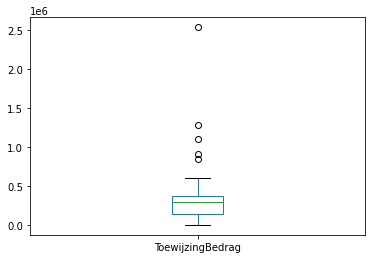

In [ ]:
# Plot ToewijzingBedrag in boxplot
plot_boxplot(data, 'ToewijzingBedrag')

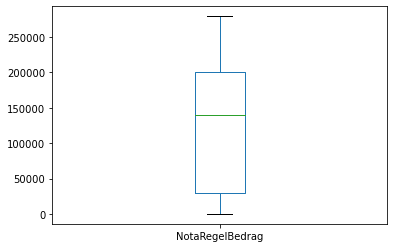

In [ ]:
# Plot NotaRegelBedrag in boxplot
plot_boxplot(data, 'NotaRegelBedrag')

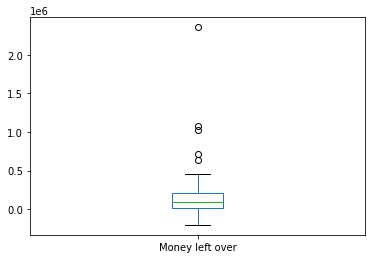

In [ ]:
# Plot Money left over in boxplot
plot_boxplot(data, 'Money left over')

## Remove Outliers

In [ ]:
# define a function called "outliers" which returns a list of index of outliers
def outliers(df, ft):
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [ ]:
# Create an empty list to store the output indices from multiple rows
index_list = []
for bedrag in ['ToewijzingBedrag', 'NotaRegelBedrag', 'Money left over']:
    index_list.extend(outliers(data, bedrag))

In [ ]:
# Look at index_list
index_list

[11, 35, 47, 60, 62, 11, 35, 47, 60, 62]

In [ ]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
# Remove the outliers and put it in a variable
data_cleaned = remove(data, index_list)

In [ ]:
# call shape on data_cleaned
data_cleaned.shape

(67, 5)

In [ ]:
# Look at the data of data_cleaned
data_cleaned

,ToewijzingBedrag,NotaRegelBedrag,Money left over,Year,Month
0,35079.980000,119.62,34960.36,2015,January
1,17309.630000,670.41,16639.22,2015,February
2,323868.367761,4094.58,-4094.58,2015,March
3,323868.367761,2474.03,-2474.03,2015,April
4,14001.060000,286.45,13714.61,2015,June
...,...,...,...,...,...
67,272555.600000,231269.88,41285.72,2020,September
68,199765.540000,270460.97,-70695.43,2020,October
69,68599.240000,77670.85,-9071.61,2020,November
70,1773.600000,5469.60,-3696.00,2020,December


## Removing again an outlier from data_cleaned

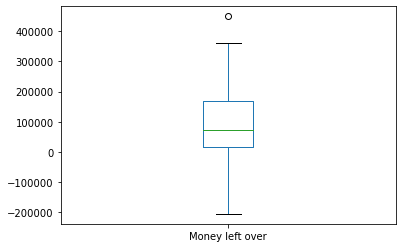

In [ ]:
# Plot Money left over in boxplot from data_cleaned
plot_boxplot(data_cleaned, 'Money left over')

In [ ]:
# define a function called "outliers" which returns a list of index of outliers
def outliers(df, ft):
    Q1 = data_cleaned[ft].quantile(0.25)
    Q3 = data_cleaned[ft].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [ ]:
# Create an empty list to store the output indices from multiple rows
outlier_list = []
for money in ['Money left over']:
    outlier_list.extend(outliers(data_cleaned, bedrag))

In [ ]:
# Look at outlier_list
outlier_list

[23]

In [ ]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
# Remove the outliers from data_cleaned and put it in a variable
data_reallycleaned = remove(data_cleaned, outlier_list)

In [ ]:
# Call shape on data_reallycleaned
data_reallycleaned.shape

(66, 5)

In [ ]:
# Look at the data of data_reallycleaned
data_reallycleaned

,ToewijzingBedrag,NotaRegelBedrag,Money left over,Year,Month
0,35079.980000,119.62,34960.36,2015,January
1,17309.630000,670.41,16639.22,2015,February
2,323868.367761,4094.58,-4094.58,2015,March
3,323868.367761,2474.03,-2474.03,2015,April
4,14001.060000,286.45,13714.61,2015,June
...,...,...,...,...,...
67,272555.600000,231269.88,41285.72,2020,September
68,199765.540000,270460.97,-70695.43,2020,October
69,68599.240000,77670.85,-9071.61,2020,November
70,1773.600000,5469.60,-3696.00,2020,December


## Checking if there are any outliers left in data_reallycleaned

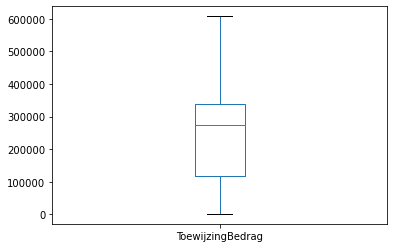

In [ ]:
# Plot ToewijzingBedrag in boxplot from data_reallycleaned
plot_boxplot(data_reallycleaned, 'ToewijzingBedrag')

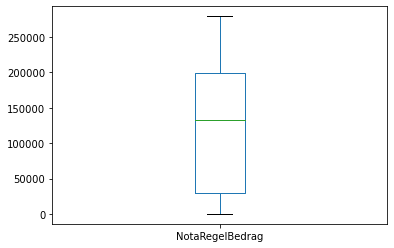

In [ ]:
# Plot NotaRegelBedrag in boxplot from data_reallycleaned
plot_boxplot(data_reallycleaned, 'NotaRegelBedrag')

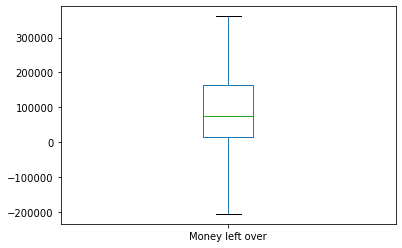

In [ ]:
# Plot Money left over in boxplot from data_reallycleaned
plot_boxplot(data_reallycleaned, 'Money left over')

There are none outliers left.

## Multiple Regression graph

Coefficients: 
 [[0.31]]
Mean squared error: 3208082833.05
Coefficient of determination (R-squared): 0.15


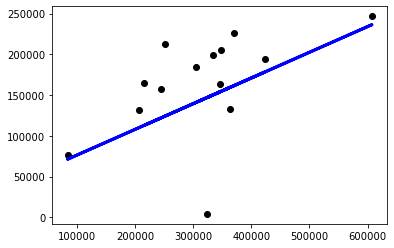

In [ ]:
# Create new dataframes
ToewijzingBedrag = data_reallycleaned[['ToewijzingBedrag']]
NotaRegelBedrag = data_reallycleaned[['NotaRegelBedrag']]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    ToewijzingBedrag, NotaRegelBedrag, test_size=0.2, random_state=1)

# get all the datasets to the same format
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Create linear regression object
mode = linear_model.LinearRegression()

# Train the model using the training sets
mode.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = mode.predict(X_test)
# The coefficients
print("Coefficients: \n", mode.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R-squared): %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.show()

# I used this link for this code: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Classification Analysis: Logistic Regression

1. Load in the youthcare dataset you created in Business Intelligence if you haven't done so already. Load in any other data you might need. Then save your file to your GitHub repository.
2. Open your research design and use in-line comments to  formulate a logistic regression; or classification, analysis based on your research question (or when not answerable using this type of analysis: perform an analysis related to your research question). Start by listing the variables which you think could predict the outcome variable you're interested in and motivate why you think they might predict your outcome variable.
3. Create your fully fitted model (so the model containing all variables you wrote down in step 2) under the python code you just wrote.
4. Test, re-fit and validate your model. Create a new model on a new line for every re-fit. Keep track of any predictor variables you exclude from the full model when re-fitting. Motivate why you are excluding; or including new variables using in-line comments.
5. Continue till 16:00, or stop when you feel you can no longer improve the model. Then save your file to your GitHub repository.

# Will the client receive VAT exemption based on the age and sex?

## Load the libraries and the data

I needed to use different variables, because the ToewijzingBedrag and NotaRegelBedrag can't be used for a classification Analysis. I created a different question to answer. 

In [ ]:
# Load libraries
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import itertools

# Import data
# please call your data 'data' to distinguish the source file from PowerBI
data_c = pd.read_csv(r"C:\Users\anouk\dataC.csv")

## Analyze the data

In [ ]:
data_c.head()

,ClientKey,ClientVoornamen,ClientTussenvoegsel,ClientAchternaam,Leeftijd_NU,ClientGeslacht,IndicatorBTWvrijstelling
0,372,Aaldert,?,Palland,21,Jongen,False
1,137,Aaldrik,van der,Geest,12,Jongen,False
2,942,Aaltjen,?,Schneiders,11,Meisje,False
3,130,Aart,?,Langeweg,121,Jongen,False
4,130,Aart,?,Langeweg,121,Jongen,True


In [ ]:
# Check the shape of the dataframe
data_c.shape

(1009, 7)

In [ ]:
# Descriptive stats
data_c.describe()

,ClientKey,Leeftijd_NU
count,1009.000000,1009.000000
mean,511.789891,31.472745
std,291.616811,39.996670
min,1.000000,2.000000
25%,261.000000,11.000000
50%,529.000000,15.000000
75%,767.000000,20.000000
max,1000.000000,121.000000


## NA values

In [ ]:
# check if there any missing values in the database
data_c.isna().any()

ClientKey                   False
ClientVoornamen             False
ClientTussenvoegsel         False
ClientAchternaam            False
Leeftijd_NU                 False
ClientGeslacht              False
IndicatorBTWvrijstelling    False
dtype: bool

There are no NA values

## Logistic Regression (Confusion Matrix)

In [ ]:
# Update sex column to numerical
data_c['ClientGeslacht'] = data_c['ClientGeslacht'].map(
    {'Jongen': 0, 'Meisje': 1})

In [ ]:
# Create a VAT exemption column
data_c['VAT exemption?'] = data_c['IndicatorBTWvrijstelling'].apply(
    lambda p: 1 if p == True else 0)

In [ ]:
# Print the data to see if the ClientGeslacht column is updated and if the data_c['VAT exemption?'] is added and is correct.
print(data_c)

      ClientKey ClientVoornamen ClientTussenvoegsel ClientAchternaam  \
0           372         Aaldert                   ?          Palland   
1           137         Aaldrik             van der            Geest   
2           942         Aaltjen                   ?       Schneiders   
3           130            Aart                   ?         Langeweg   
4           130            Aart                   ?         Langeweg   
...         ...             ...                 ...              ...   
1004        122     Zine-Eddine                  de             Moel   
1005        547            Zino                 van             Wijk   
1006        547            Zino                 van             Wijk   
1007        605            Zola                   ?          Huijgen   
1008        445        Zoulikha                 van       Roosendaal   

      Leeftijd_NU  ClientGeslacht  IndicatorBTWvrijstelling  VAT exemption?  
0              21               0                     Fal

In [ ]:
# Select the desired features
features = data_c[['ClientGeslacht', 'Leeftijd_NU']]
VAT_exemption = data_c['VAT exemption?']

In [ ]:
# Perform train, test, split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, VAT_exemption)

In [ ]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
# Print the shapes of the train and test sets
print('Train set:', train_features.shape, train_labels.shape)
print('Test set:', test_features.shape, test_labels.shape)

Train set: (756, 2) (756,)
Test set: (253, 2) (253,)


In [ ]:
# Create and train the model
model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [ ]:
# Score the model on the train data
print(model.score(train_features, train_labels))

0.6283068783068783


In [ ]:
# Score the model on the test data
print(model.score(test_features, test_labels))

0.6837944664031621


In [ ]:
# Analyze the coefficients
print(model.coef_)

[[ 0.01 -0.04]]


In [ ]:
# Predict the test_features
y_prediction = model.predict(test_features)

In [ ]:
# Confusion matrix
# Define the plot_confusion_matrix to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.cool):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot functions
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Print confusion_matrix
print(confusion_matrix(test_labels, y_prediction, labels=[1, 0]))

[[  0  80]
 [  0 173]]


Confusion matrix, without normalization
[[  0  80]
 [  0 173]]
Coefficients: 
 [[ 0.01 -0.04]]
Mean squared error: 0.32
Coefficient of determination: -0.46
Test accuracy =  0.6837944664031621


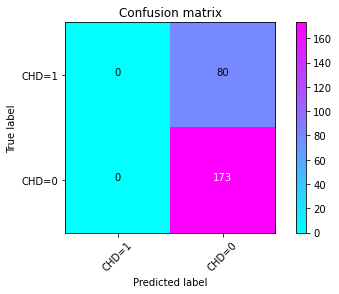

In [ ]:
#Compute confusion matrix

cnf_matrix = confusion_matrix(test_labels, y_prediction, labels=[1, 0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[
                      'CHD=1', 'CHD=0'], normalize=False,  title='Confusion matrix')
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" %
      mean_squared_error(test_labels, y_prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" %
      r2_score(test_labels, y_prediction))
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(test_labels, y_prediction))

## Prediction

Would my family receive VAT exemption? This prediction will show whether we will receive VAT exemption or not.

In [ ]:
# Create np.arrays for my family
Me = np.array([1.0, 18.0])
Brother = np.array([0.0, 20.0])
Sister = np.array([1.0, 18.0])
Mom = np.array([1.0, 52.0])
Dad = np.array([0.0, 55.0])

In [ ]:
# Put the np.arrays together
sample_clients = np.array([Me, Brother, Sister, Mom, Dad])

In [ ]:
# Transform sample_clients and print it out
sample_clients = scaler.transform(sample_clients)
print(sample_clients)

[[ 1.01 -0.35]
 [-0.99 -0.3 ]
 [ 1.01 -0.35]
 [ 1.01  0.48]
 [-0.99  0.56]]


C:\Users\anouk\anaconda3\envs\DeepLearning_GPU\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Make VAT exemption predictions!
print(model.predict(sample_clients))
print(model.predict_proba(sample_clients))

[0 0 0 0 0]
[[0.62 0.38]
 [0.63 0.37]
 [0.62 0.38]
 [0.63 0.37]
 [0.64 0.36]]


# Decision Trees

1. Load in the youthcare dataset you created in Business Intelligence if you haven't done so already. Load in any other data you might need. Then save your file to your GitHub repository.
2. Open your research design and use in-line comments to  formulate a classification analysis using decision trees based on your research question (or when not answerable using this type of analysis: perform an analysis related to your research question). Start by listing the variables which you think could predict the outcome variable you're interested in and motivate why you think they might predict your outcome variable.
3. Create your fully fitted model (so the model containing all variables you wrote down in step 2) under the python code you just wrote.
4. Test, re-fit and validate your model. Create a new model on a new line for every re-fit. Keep track of any predictor variables you exclude from the full model when re-fitting. Motivate why you are excluding; or including new variables using in-line comments.
5. Continue till 16:00, or stop when you feel you can no longer improve the model. Then save your file to your GitHub repository.

## Load the libraries and the data

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score
from dtreeviz.trees import dtreeviz
from dtreeviz.colors import adjust_colors
from colour import Color, rgb2hex
import numpy as np

In [ ]:
# Install dtreeviz package
#!conda install -c conda-forge dtreeviz

In [ ]:
# Install python-graphiz
# conda install python-graphviz

## Analysing the data

In [ ]:
# Print the columns of data_reallycleaned
print(data_reallycleaned.columns)

Index(['ToewijzingBedrag', 'NotaRegelBedrag', 'Money left over', 'Year',
       'Month'],
      dtype='object')


In [ ]:
# Print the first rows of data_reallycleaned
print(data_reallycleaned.head())

   ToewijzingBedrag  NotaRegelBedrag  Money left over  Year     Month
0      35079.980000           119.62         34960.36  2015   January
1      17309.630000           670.41         16639.22  2015  February
2     323868.367761          4094.58         -4094.58  2015     March
3     323868.367761          2474.03         -2474.03  2015     April
4      14001.060000           286.45         13714.61  2015      June


## Decision Trees Regressor Visualization

In [ ]:
# Create Money function to substract NotaRegelBedrag from ToewijzingBedrag
MoneyLeft = data_reallycleaned['ToewijzingBedrag']-data_reallycleaned['NotaRegelBedrag']
data_reallycleaned['Money'] = MoneyLeft

In [ ]:
# Create the labels and the data
labels = data_reallycleaned['Money']
data = data_reallycleaned[['ToewijzingBedrag', 'NotaRegelBedrag']]

In [ ]:
# Train the labels and the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.3, random_state=1)

In [ ]:
# Fit the train_data and the train_labels into the DecisionTreeRegressor
treee = DecisionTreeRegressor(random_state = 0)
treee.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Print a text_representation of the decision tree
text_representation = tree.export_text(treee)
print(text_representation)

|--- feature_0 <= 322851.91
|   |--- feature_0 <= 152021.59
|   |   |--- feature_1 <= 122529.85
|   |   |   |--- feature_0 <= 70941.16
|   |   |   |   |--- feature_1 <= 14975.69
|   |   |   |   |   |--- feature_0 <= 7887.33
|   |   |   |   |   |   |--- value: [-3696.00]
|   |   |   |   |   |--- feature_0 >  7887.33
|   |   |   |   |   |   |--- feature_0 <= 31487.33
|   |   |   |   |   |   |   |--- feature_0 <= 22602.15
|   |   |   |   |   |   |   |   |--- feature_0 <= 15655.35
|   |   |   |   |   |   |   |   |   |--- value: [13714.61]
|   |   |   |   |   |   |   |   |--- feature_0 >  15655.35
|   |   |   |   |   |   |   |   |   |--- value: [16639.22]
|   |   |   |   |   |   |   |--- feature_0 >  22602.15
|   |   |   |   |   |   |   |   |--- value: [21170.73]
|   |   |   |   |   |   |--- feature_0 >  31487.33
|   |   |   |   |   |   |   |--- value: [34960.36]
|   |   |   |   |--- feature_1 >  14975.69
|   |   |   |   |   |--- feature_1 <= 71046.08
|   |   |   |   |   |   |--- feature_1 

In [ ]:
# Create the target variable and the features
target1 = list(data_reallycleaned['Money'].unique())
feature_names1 = list(data.columns)

C:\Users\anouk\anaconda3\envs\DeepLearning_GPU\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


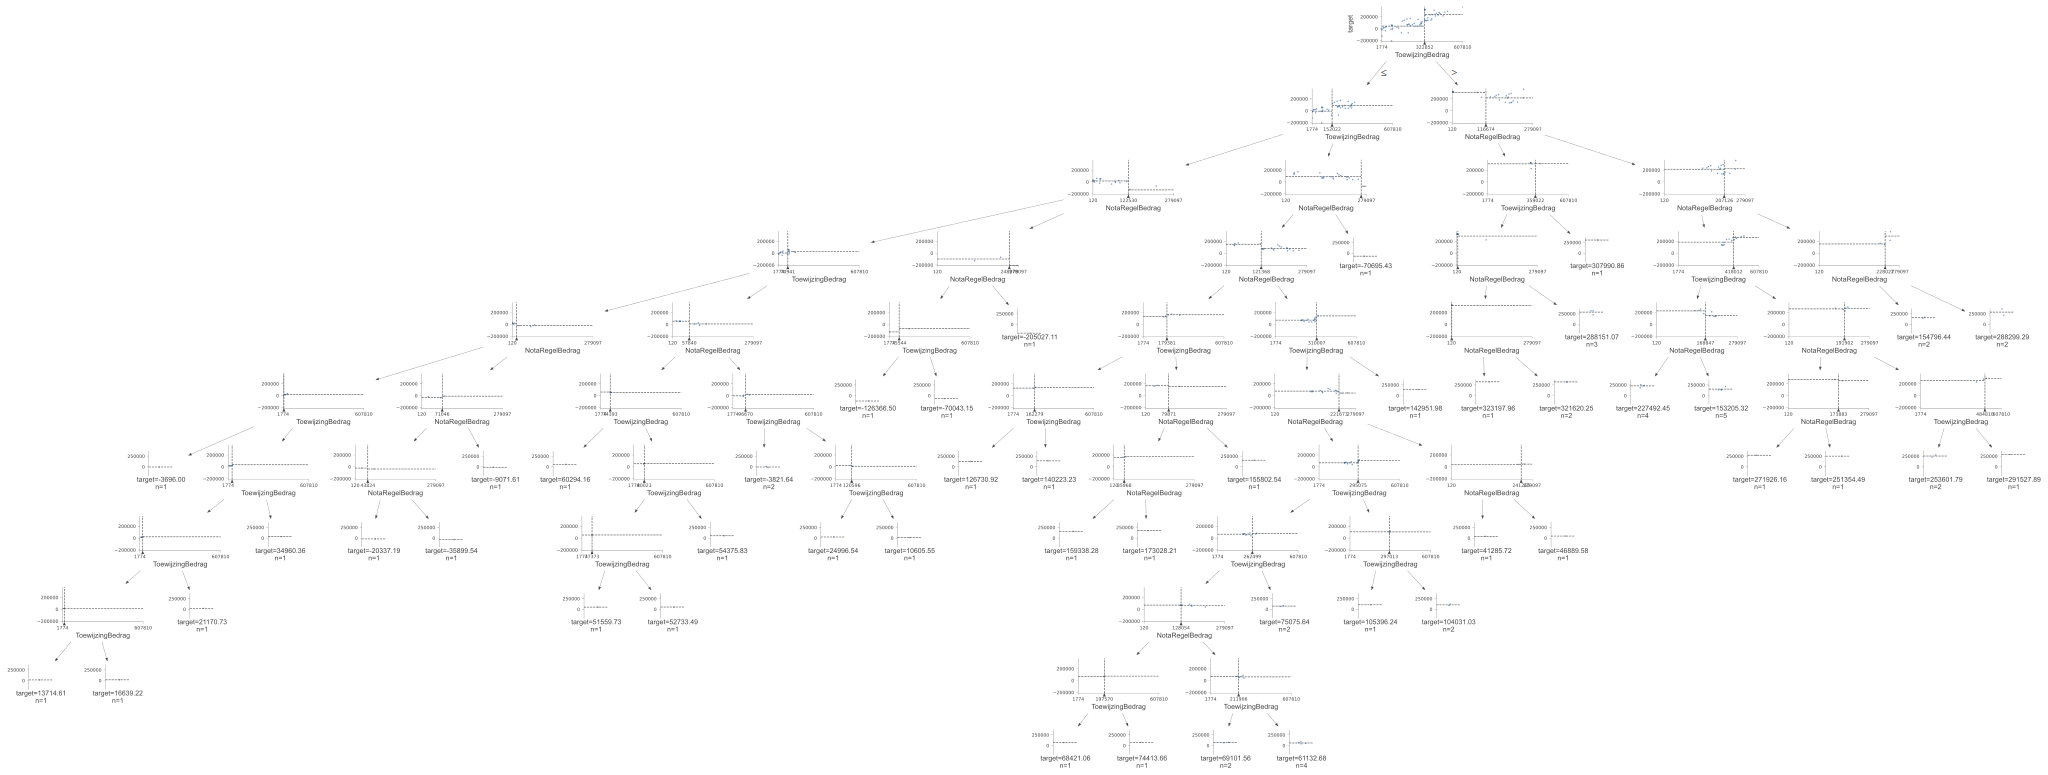

In [ ]:
# Visualize decision tree
viz = dtreeviz(treee, data, labels,
                target_name="target",
                feature_names=feature_names1,
                class_names=list(target1))

viz

## Decision Trees Classifier Graph

In [ ]:
# Select the desired features
features = data_c[['ClientGeslacht', 'Leeftijd_NU']]
labels1 = data_c['VAT exemption?']

In [ ]:
# Train the features and the label
X_train, X_test, y_train, y_test = train_test_split(features, labels1, test_size = 0.3,random_state=42)

In [ ]:
# Fit the X_train and y_train on the DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
# Calculate the predicted values
y_predict = clf_model.predict(X_test)

In [ ]:
# Calculate the scores of the actual value and the predicted value
accuracy = accuracy_score(y_test,y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1score = f1_score(y_test, y_predict)

In [ ]:
# Create the target variable and the feature_names
target = list(data_c['VAT exemption?'].unique())
feature_names = list(features.columns)

In [ ]:
# Print a text_representation of the decision tree
text_representation = tree.export_text(clf_model)
print(text_representation)

|--- feature_1 <= 19.50
|   |--- feature_1 <= 16.50
|   |   |--- feature_1 <= 11.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  11.50
|   |   |   |--- class: 0
|   |--- feature_1 >  16.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|--- feature_1 >  19.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_1 <= 20.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  20.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 24.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  24.00
|   |   |   |--- class: 0



Accuracy:  0.6534653465346535
Recall:  0.10416666666666667
Precision:  0.3448275862068966
F1 score:  0.16


C:\Users\anouk\anaconda3\envs\DeepLearning_GPU\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


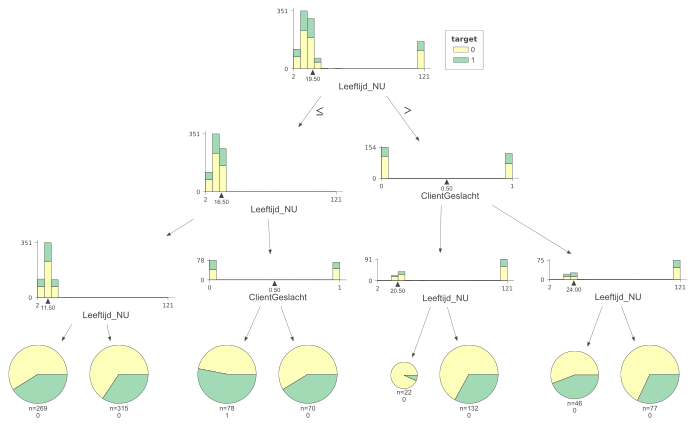

In [ ]:
# Print the scores
print('Accuracy: ',accuracy)
print('Recall: ',recall)
print('Precision: ',precision)
print('F1 score: ',f1score)

# Visualize the decision tree
viz = dtreeviz(clf_model, features, labels1,
                target_name="target",
                feature_names=feature_names,
                class_names=list(target))

viz

# Cluster Analysis

1. Load in the youthcare dataset you created in Business Intelligence if you haven't done so already. Load in any other data you might need. Then save your file to your GitHub repository.
2. Open your research design and use in-line comments to  formulate a classification analysis using cluster analysis based on your research question (or when not answerable using this type of analysis: perform an analysis related to your research question). Start by listing the variables which you think could predict the outcome variable you're interested in and motivate why you think they might predict your outcome variable.
3. Create your fully fitted model (so the model containing all variables you wrote down in step 2) under the python code you just wrote.
4. Test, re-fit and validate your model. Create a new model on a new line for every re-fit. Keep track of any predictor variables you exclude from the full model when re-fitting. Motivate why you are excluding; or including new variables using in-line comments.
5. Continue till 16:00, or stop when you feel you can no longer improve the model. Then save your file to your GitHub repository.

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Analyzing data

In [ ]:
# Read the csv file
data = pd.read_csv(r"C:\Users\anouk\dataZ.csv")

In [ ]:
# Check the data
data.head()

,ZorgleverancierKey,ZorgleverancierNaam,ToewijzingBedrag,NotaRegelBedrag
0,2,Regionaal Instituut voor Ontwikkelingsprobleme...,23095.80,15845.11
1,3,Psychologisch Instituut Tilburg (PIT),830.00,74.70
2,7,Indigo Brabant BV,NaN,4805.13
3,10,Memo B.V.,188595.01,138135.40
4,17,Silver Specialistische Zorg B.V.,8071.20,3390.52


In [ ]:
# Descriptive stats
data.describe()

,ZorgleverancierKey,ToewijzingBedrag,NotaRegelBedrag
count,141.000000,76.000000,1.400000e+02
mean,273.482270,64109.758553,6.431950e+04
std,154.132068,136185.364510,1.647133e+05
min,2.000000,109.650000,7.470000e+01
25%,153.000000,5153.252500,2.219108e+03
50%,265.000000,14772.015000,8.278850e+03
75%,411.000000,73114.267500,5.111286e+04
max,530.000000,953192.230000,1.508152e+06


## NA values

In [ ]:
# check if there any missing values in the database
data.isna().any()

ZorgleverancierKey     False
ZorgleverancierNaam    False
ToewijzingBedrag        True
NotaRegelBedrag         True
dtype: bool

In [ ]:
# Calculate the mean of the missing values
mean_T = data['ToewijzingBedrag'].mean()
mean_N = data['NotaRegelBedrag'].mean()

# Replace the NA values with the mean values
data['ToewijzingBedrag'].fillna(value=mean_T, inplace=True)
data['NotaRegelBedrag'].fillna(value=mean_N, inplace=True)

# Check if the NA values are corrected
data.isna().any()

ZorgleverancierKey     False
ZorgleverancierNaam    False
ToewijzingBedrag       False
NotaRegelBedrag        False
dtype: bool

In [ ]:
data.head()

,ZorgleverancierKey,ZorgleverancierNaam,ToewijzingBedrag,NotaRegelBedrag
0,2,Regionaal Instituut voor Ontwikkelingsprobleme...,23095.800000,15845.11
1,3,Psychologisch Instituut Tilburg (PIT),830.000000,74.70
2,7,Indigo Brabant BV,64109.758553,4805.13
3,10,Memo B.V.,188595.010000,138135.40
4,17,Silver Specialistische Zorg B.V.,8071.200000,3390.52


## Check for outliers

In [ ]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

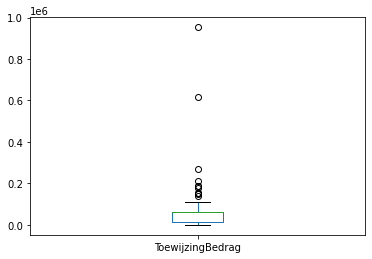

In [ ]:
plot_boxplot(data, 'ToewijzingBedrag')

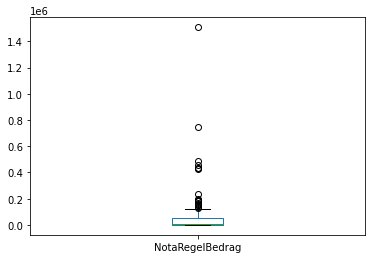

In [ ]:
plot_boxplot(data, 'NotaRegelBedrag')

In [ ]:
# define a function called "outliers" which returns a list of index of outliers
def outliers(df, ft):
    Q1 = data[ft].quantile(0.25)
    Q3 = data[ft].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [ ]:
# Create an empty list to store the output indices from multiple rows
index_list = []
for bedrag in ['ToewijzingBedrag', 'NotaRegelBedrag']:
    index_list.extend(outliers(data, bedrag))

In [ ]:
index_list

[3,
 12,
 27,
 31,
 33,
 35,
 70,
 99,
 124,
 126,
 140,
 3,
 7,
 12,
 14,
 22,
 25,
 27,
 31,
 33,
 35,
 38,
 41,
 70,
 99,
 113,
 126,
 127,
 133,
 138]

## Delete the outliers

In [ ]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
# Remove the outliers
data_cleaned = remove(data, index_list)

In [ ]:
# Check the shape of the new dataframe
data_cleaned.shape

(120, 4)

In [ ]:
# View the dataframe
data_cleaned

,ZorgleverancierKey,ZorgleverancierNaam,ToewijzingBedrag,NotaRegelBedrag
0,2,Regionaal Instituut voor Ontwikkelingsprobleme...,23095.800000,15845.11
1,3,Psychologisch Instituut Tilburg (PIT),830.000000,74.70
2,7,Indigo Brabant BV,64109.758553,4805.13
4,17,Silver Specialistische Zorg B.V.,8071.200000,3390.52
5,19,Fronto B.V. hodn Inpetto Jeugd GGZ,64109.758553,67945.85
...,...,...,...,...
134,514,Gezinshuis ‘Nu ben ik hier’,64109.758553,49285.20
135,517,Pandor V.O.F.,64109.758553,9744.00
136,519,Spectrum Multimedia & IT,64109.758553,3830.40
137,522,Samen Sterk Pedagogische gezinsbegeleiding,64109.758553,10922.40


## Calculate the money that is left

In [ ]:
# Calculate the money that is left over
MoneyLeft = data_cleaned['ToewijzingBedrag']-data_cleaned['NotaRegelBedrag']
data_cleaned['Money'] = MoneyLeft

In [ ]:
# View the dataframe to see the money column
data_cleaned

,ZorgleverancierKey,ZorgleverancierNaam,ToewijzingBedrag,NotaRegelBedrag,Money
0,2,Regionaal Instituut voor Ontwikkelingsprobleme...,23095.800000,15845.11,7250.690000
1,3,Psychologisch Instituut Tilburg (PIT),830.000000,74.70,755.300000
2,7,Indigo Brabant BV,64109.758553,4805.13,59304.628553
4,17,Silver Specialistische Zorg B.V.,8071.200000,3390.52,4680.680000
5,19,Fronto B.V. hodn Inpetto Jeugd GGZ,64109.758553,67945.85,-3836.091447
...,...,...,...,...,...
134,514,Gezinshuis ‘Nu ben ik hier’,64109.758553,49285.20,14824.558553
135,517,Pandor V.O.F.,64109.758553,9744.00,54365.758553
136,519,Spectrum Multimedia & IT,64109.758553,3830.40,60279.358553
137,522,Samen Sterk Pedagogische gezinsbegeleiding,64109.758553,10922.40,53187.358553


In [ ]:
# save data_cleaned to use the column money in my dashboard
data_cleaned.to_csv(r'C:\Users\anouk\Downloads\test3.csv')

## Plot the scatterplot

In [ ]:
#Load Data
LeftMoney = data_cleaned['Money']
Caregiver = data_cleaned[['ZorgleverancierNaam']]
Key = data_cleaned[['ZorgleverancierKey']]

# Reshape the leftmoney columns
data = LeftMoney.values.reshape(-1,2)

# Perform PCA
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

# Print the shape of df
df.shape

(60, 2)

In [ ]:
# View the largest 10 values of the money
data_cleaned.nlargest(10, "Money")

,ZorgleverancierKey,ZorgleverancierNaam,ToewijzingBedrag,NotaRegelBedrag,Money
88,347,Trivers Psychologie B.V.,64109.758553,91.20,64018.558553
67,255,Van der Velden kinder- en jeugdpsychiatrie,64109.758553,155.70,63954.058553
76,302,Tract Psychologen,64109.758553,165.39,63944.368553
32,132,Koraal Groep,64109.758553,475.95,63633.808553
21,98,De Bascule,64109.758553,563.40,63546.358553
139,527,Stichting Sterk Huis West Brabant,64109.758553,610.20,63499.558553
66,253,Praktijk de Hand,64109.758553,699.30,63410.458553
98,389,ASVZ,64109.758553,701.40,63408.358553
6,23,Kobussen & Partners Psychologen (Instelling),64109.758553,722.10,63387.658553
108,422,Kindercoach Oosterhout,64109.758553,738.00,63371.758553


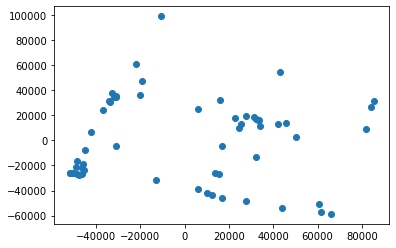

In [ ]:
# Scatterplot
plt.scatter(df[:,0],df[:,1], label='True Position')

## N_clusters

In [ ]:
# Reshape and ravel the Caregiver column
true_label = Caregiver.values.reshape(-1,1)
true_labels_names = true_label.ravel()
# Use LabelEncoder to fit true_labels_names
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_labels_names)

In [ ]:
# Reshape the classes
a = label_encoder.classes_.reshape(-1,2)

# Print the shape of a
a.shape

(59, 2)

In [ ]:
# Define n_clusters
n_clusters = len(a)

## KMeans

In [ ]:
# Calculate the KMeans and fit it
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df)

KMeans(n_clusters=59)

In [ ]:
# Print the cluster centers of kmeans
print(kmeans.cluster_centers_)

[[ 12452.16 -43399.52]
 [  5917.02  25206.9 ]
 [-48688.34 -16709.49]
 [ 45692.81  13924.58]
 [-33623.72  30365.16]
 [ 65862.33 -58695.84]
 [-10812.55  99163.04]
 [ 81694.23   9147.16]
 [ 16962.9   -4222.03]
 [ 27542.81  19201.58]
 [ 43206.19  54550.28]
 [-19379.43  47448.85]
 [ 84324.22  27016.14]
 [-42416.92   6973.03]
 [-13103.77 -31370.37]
 [-51627.65 -26039.81]
 [ 27668.   -48238.74]
 [ 13822.14 -25912.35]
 [ 32241.74 -12896.93]
 [ 33054.78  16523.35]
 [ 43882.65 -54204.28]
 [-31052.59  -4187.65]
 [-31189.6   35826.2 ]
 [ 50341.62   2399.74]
 [-20411.07  36645.24]
 [-22031.91  60972.61]
 [ 16013.59  32153.17]
 [ 60555.2  -50570.54]
 [ 24308.75  10094.34]
 [-45487.08 -23914.44]
 [-44882.76  -7688.06]
 [  6148.07 -38846.55]
 [-36735.88  24517.63]
 [-47658.67 -27602.91]
 [ 16951.96 -45788.75]
 [ 22741.77  18250.83]
 [ 34135.79  11612.48]
 [ 61353.18 -57084.6 ]
 [ 85492.35  31251.29]
 [-48882.18 -21335.02]
 [ 42203.84  12769.36]
 [ 25618.06  13485.7 ]
 [-45919.32 -18732.07]
 [ 31130.75

In [ ]:
# Print the labels of kmeans
label = kmeans.labels_
print(label)

[28 31 45  6 21 11 50 37 15 17 39  9 20 34 12 29  7  1 30 49  8 24 25 55
  0 40 41 57 23 46  5 15 43 36 51 35 56 13  4 22 53 58 32 14 10 18 16 33
 44  3 27 38 19 54 52 47 48 26 42  2]


## Plot the clustered graph

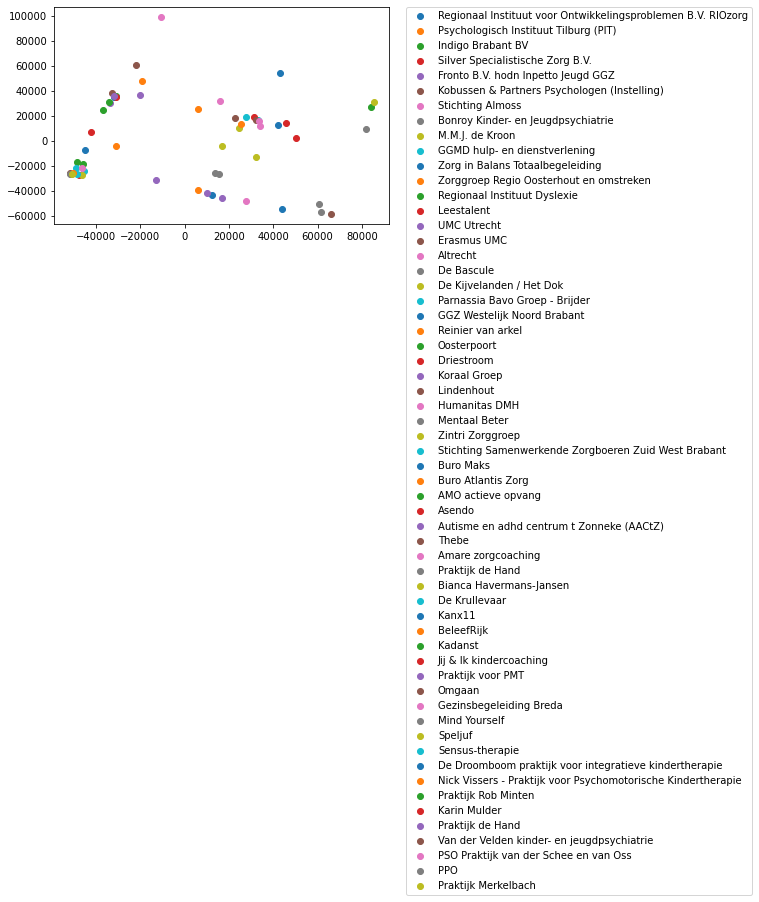

In [ ]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i, cmap='rainbow')
plt.legend(label_encoder.inverse_transform(true_labels), bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)
plt.show()

# Model selected for grading

Which model answer your research question best? Or which one is the most insightful? Select one, insert it below and motivate your answer in the section below:
Motivation: I’m going to predict the money that is left over. My data is labelled because I know all real values of my outcome variable. My outcome variable is a number and therefore I can use the simple & multiple linear regression and decision trees to predict the money. Because my outcome variable is a number and linear is much easier to understand, I will choose simple linear regression.

## Research question: How much money is left based on the product categories?

## Explanation

I checked the data for NA values and outliers, but there aren't any, because I used the data which I used earlier in this document. In the cluster analysis, I saved the table data_cleaned into a csv file and inserted the money column from power bi into the data_cleaned csv file to create another csv file to use it for this final model. So, I already cleaned the data. At last I replaced the values of productcategorie to get the best model.

## Load libraries and data

In [ ]:
#Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Read the csv file
datamoney = pd.read_csv(r"C:\Users\anouk\moneyleft.csv", sep=',')

## Analyze data

In [ ]:
# Check the data
datamoney.head()

,ZorgleverancierKey,ZorgleverancierNaam,ProductCategorie,Money
0,2,Regionaal Instituut voor Ontwikkelingsprobleme...,Jeugd-ggz,725069
1,3,Psychologisch Instituut Tilburg (PIT),Jeugd-ggz,7553
2,3,Psychologisch Instituut Tilburg (PIT),Specialistische ggz,7553
3,7,Indigo Brabant BV,Generalistische basis-ggz,59304628553
4,7,Indigo Brabant BV,Jeugd-ggz,59304628553


In [ ]:
# Descriptive stats
datamoney.describe()

,ZorgleverancierKey,Money
count,198.000000,1.980000e+02
mean,270.924242,2.124332e+10
std,139.362833,3.233974e+10
min,2.000000,-7.621181e+10
25%,173.000000,-6.340868e+05
50%,263.000000,4.515760e+05
75%,403.750000,5.934148e+10
max,527.000000,6.401856e+10


## NA values

In [ ]:
# check if there any missing values in the database
datamoney.isna().any()

ZorgleverancierKey     False
ZorgleverancierNaam    False
ProductCategorie       False
Money                  False
dtype: bool

## Check outliers

In [ ]:
# Define plot_boxplot to view the outliers if there are any
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

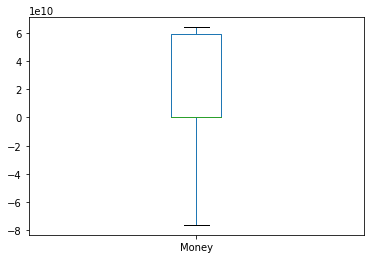

In [ ]:
plot_boxplot(datamoney, 'Money')

There are none outliers

## Replace values of the column ProductCategorie

In [ ]:
datamoney[['ProductCategorie']] = datamoney[['ProductCategorie']].replace({'Activiteiten in het preventief justitieel kader': 0, 'Dagbehandeling': 1, 'Dagbesteding': 2, 'Generalistische basis-ggz': 3, 'Jeugdbescherming': 4, 'Jeugd-ggz': 5, 'Jeugdhulp ambulant': 6, 'Jeugdhulp crisis': 7, 'Jeugdhulp verblijf (excl. behandeling)': 8, 'Jeugdhulp verblijf (incl. behandeling)': 9, 'Jeugdreclassering': 10, 'Kindergeneeskunde': 11, 'Landelijk ingekochte zorg': 12,
                                                                          'Met verblijf: gesloten plaatsing': 13, 'Met verblijf: gezinsgericht': 14, 'Met verblijf: overig residentieel': 15, 'Met verblijf: pleegzorg': 16, 'Persoonlijke verzorging': 17, 'Specialistische ggz': 18, 'Vervoerdiensten': 19, 'Zonder verblijf: ambulant loc. aanbieder': 20, 'Zonder verblijf: daghulp loc. aanbieder': 21, 'Zonder verblijf: door wijk- of buurtteam': 22, 'Zonder verblijf: jeugdhulp eigen netwerk': 23})

In [ ]:
datamoney[['ProductCategorie']]

,ProductCategorie
0,5
1,5
2,18
3,3
4,5
...,...
193,6
194,6
195,6
196,7


## Plot the linear regression graph

Coefficients: 
 [2.e+08]
Mean squared error: 937693223469174882304.00
Coefficient of determination (R-squared): 0.01


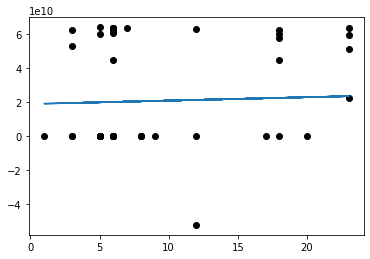

In [ ]:
# Create new dataframes
LeftMoney = datamoney['Money']
Caregiver = datamoney[['ProductCategorie']]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(Caregiver, LeftMoney, test_size=0.25, random_state=55)

# get all the datasets to the same format
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Create linear regression object
mode = LinearRegression()

# Train the model using the training sets
mode.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = mode.predict(X_test)

# The coefficients
print("Coefficients: \n", mode.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R-squared): %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred)

plt.show()

## Decision Trees Final Model

### Explanation for redo model

The submitted ML model (the model before this) only meets the criteria for an insufficient. I thought my model was good, but apparantly I was wrong about my predictor ProductCategorie. My predictor ProductCategorie is not a numeric variable. To improve, I am going to start to treat ProductCategorie as a categorical variable and make a decision tree model. 
For the evaluation of the model, I am going to plot a classification report and a confusion matrix.

### Load the libraries and the data

In [ ]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import graphviz
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Read the csv file
datamoney = pd.read_csv(r"C:\Users\anouk\moneyleft.csv", sep=',')

### Analyze the data

In [ ]:
# Check the data
datamoney.head()

,ZorgleverancierKey,ZorgleverancierNaam,ProductCategorie,Money
0,2,Regionaal Instituut voor Ontwikkelingsprobleme...,Jeugd-ggz,725069
1,3,Psychologisch Instituut Tilburg (PIT),Jeugd-ggz,7553
2,3,Psychologisch Instituut Tilburg (PIT),Specialistische ggz,7553
3,7,Indigo Brabant BV,Generalistische basis-ggz,59304628553
4,7,Indigo Brabant BV,Jeugd-ggz,59304628553


In [ ]:
# Descriptive stats
datamoney.describe()

,ZorgleverancierKey,Money
count,198.000000,1.980000e+02
mean,270.924242,2.124332e+10
std,139.362833,3.233974e+10
min,2.000000,-7.621181e+10
25%,173.000000,-6.340868e+05
50%,263.000000,4.515760e+05
75%,403.750000,5.934148e+10
max,527.000000,6.401856e+10


### NA values

In [ ]:
# check if there any missing values in the database
datamoney.isna().any()

ZorgleverancierKey     False
ZorgleverancierNaam    False
ProductCategorie       False
Money                  False
dtype: bool

### Check outliers

In [ ]:
# Define plot_boxplot to view the outliers if there are any
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

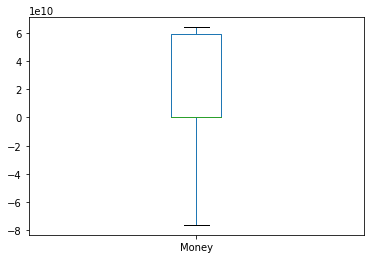

In [ ]:
plot_boxplot(datamoney, 'Money')

There are none outliers

### Plot the decision tree

In [ ]:
features = pd.get_dummies(datamoney[['ProductCategorie']])

In [ ]:
label = datamoney[['Money']]

In [ ]:
# Train the features and the label
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(X_train)
# X_train = ohe.transform(X_train)
# X_test = ohe.transform(X_test)

In [ ]:
# Fit the X_train and y_train on the DecisionTreeClassifier
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Calculate the predicted values
y_predict = clf.predict(X_test)

In [ ]:
# Create the target variable and the feature_names
target = list(datamoney['Money'].unique())
feature_names = list(features.columns)

In [ ]:
print(type(feature_names))
print(type(target))

<class 'list'>
<class 'list'>


In [ ]:
# Print a text_representation of the decision tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_15 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [3491525582.00]
|   |   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [6207754872.57]
|   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [7053575187.44]
|   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   | 

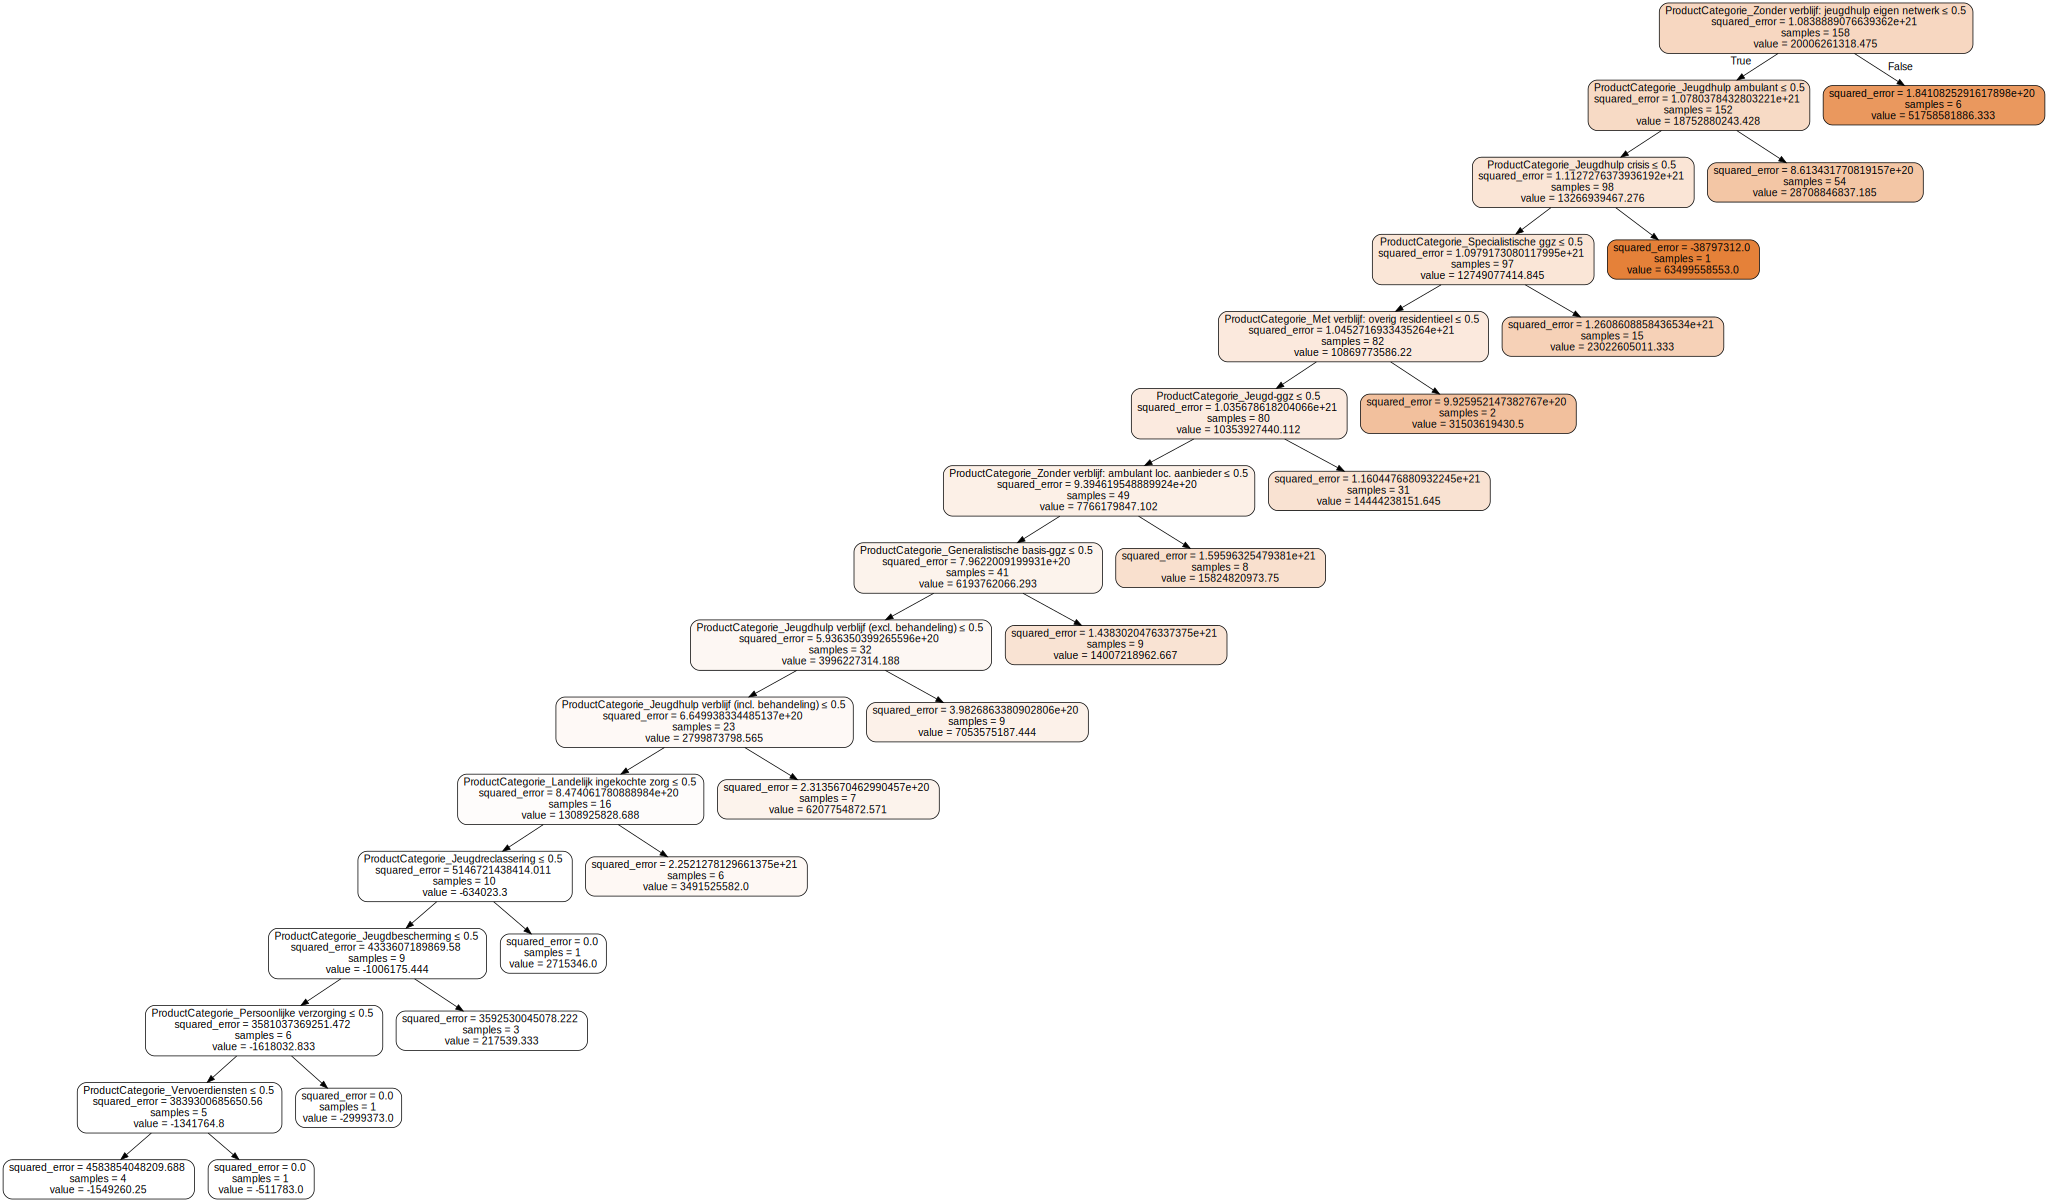

In [ ]:
# Plot the decision tree using export_graphviz method
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names= feature_names,
                                class_names= target,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# save the decision tree into a pdf document.
graph.render(r"C:\Users\anouk\Downloads\decision_tree_graphivz")

'C:\\Users\\anouk\\Downloads\\decision_tree_graphivz.pdf'

### Plot the confusion matrix and the classification report

In [ ]:
# Print the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Print the classification report
report = classification_report(y_test, y_predict, zero_division=0)
print(report)

              precision    recall  f1-score   support

    -5465625       0.00      0.00      0.00       2.0
    -5224461       0.00      0.00      0.00       1.0
    -5084736       0.00      0.00      0.00       1.0
    -2639019       0.00      0.00      0.00       1.0
    -1859692       0.00      0.00      0.00       2.0
    -1322364       0.00      0.00      0.00       1.0
     -826925       0.00      0.00      0.00       2.0
     -770095       0.00      0.00      0.00       1.0
     -590478       0.00      0.00      0.00       1.0
     -511783       0.00      0.00      0.00       1.0
     -263628       0.00      0.00      0.00       1.0
     -152529       0.00      0.00      0.00       1.0
      -71151       0.00      0.00      0.00       1.0
       -1065       0.00      0.00      0.00       1.0
      307541       0.00      0.00      0.00       2.0
      451576       0.00      0.00      0.00       2.0
      744977       0.00      0.00      0.00       0.0
 14824558553       0.00    

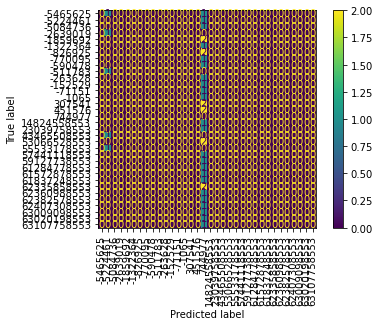

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_predict, xticks_rotation='vertical')

plt.show()

# That's all folks! 